In [1]:
import numpy as np
import sympy as sy
import math
import gc
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#
#Definimos las matrices de Gell-Mann
#

l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

#
#Definimos el producto entre matrices y los coeficientes matriciales;
#
Ra = default_rng(42).random((3,3))
def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

#Datos númericos (Masas M y sus errores dM)
#Quarks up eV
u = 2.16e+6
du= 0.49e+6
c = 1.27e+9
dc= 0.02e+9
t = 1.7269e+11
dt= 0.30e+9
#Quarks down eV
d = 4.67e+6
dd= 0.48e+6
s = 9.34e+7
ds= 8.6e+6
b = 4.18e+9
db= 0.03e+9
#Leptones Cargados eV
e   = 5.1099895e+5
de  = 1.5e-4
mu  = 1.0565838e+8
dmu = 2.3
tau = 1.77686e+9
dtau= 1.20e+5
#Diferencias de masas al cuadrado de neutrinos eV^2
Del21 = 7.53e-5
dDel21= 0.18e-5
Del32 = 2.437e-3
dDel32= 0.033e-3

#
# Definimos las matrices diagonales para las masas de los quarks; up, down y leptones cargados.
#
Mu = (1/t)*np.diagflat([u,c,t], 0)
Md = (1/b)*np.diagflat([d,s,b],0)
Ml = (1/tau)*np.diagflat([e,mu,tau],0)

#Se calculan los coeficientes de las matrices (no recuerdo para que)
#matrixcoeff(Mu)
#matrixcoeff(Md)
#matrixcoeff(Ml)

#Calculamos $C_0$ para $M$
C0u = matrixdot(l0, Mu)
C0d = matrixdot(l0, Md)
C0l = matrixdot(l0, Ml)

C3u = matrixdot(l3, Mu)
C3d = matrixdot(l3, Md)
C3l = matrixdot(l3, Ml)

C8u = matrixdot(l8, Mu)
C8d = matrixdot(l8, Md)
C8l = matrixdot(l8, Ml)

#Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.
C0Mu = 1/t
C0Mc = 1/t
C0Mt = -(u+c)/t**2
DC0u = (C0Mu*du + C0Mc*dc + C0Mt*dt)

C0Md = 1/b
C0Ms = 1/b
C0Mb = -(d+s)/b**2
DC0d = (C0Md*dd + C0Ms*ds + C0Mb*db)

C0Me = 1/tau
C0Mmu = 1/tau
C0Mtau = (e+mu)/tau**2
DC0l = (C0Me*de + C0Mmu*dmu + C0Mtau*dtau)

#Porque hice esta mamada???!!!
C03 = 2*np.sqrt(3/2)*C0l
C33 = 2*C3l
C83 = 2*C8l

gc.collect()

0

In [2]:
##
#Aqui coloco toooodaaaas mis listas para poder cambiarlas mas facilmente

#Majorana Caso 1
x = np.arange(0,5,0.01)
Corre_C1 = np.arange(0,5, 0.01)
X1, Y1 = np.meshgrid(x, Corre_C1)

## **Ahora vemos el primer caso considerando que las masas son una mezcla de Dirac y Majorana y que ademas tenemos: $\delta _1 +\delta _2=0$, $\quad \delta _1 - \delta _2=\delta$**

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_29846/3851134235.py:16: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('Comparación entre $\Delta m_{ij}^2$ con Majorana')
/tmp/ipykernel_29846/3851134235.py:28: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta m_{21}^2\; (eV^2)$', labelpad=0)
/tmp/ipykernel_29846/3851134235.py:41: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta m_{32}^2\; (eV^2)$', labelpad=0)


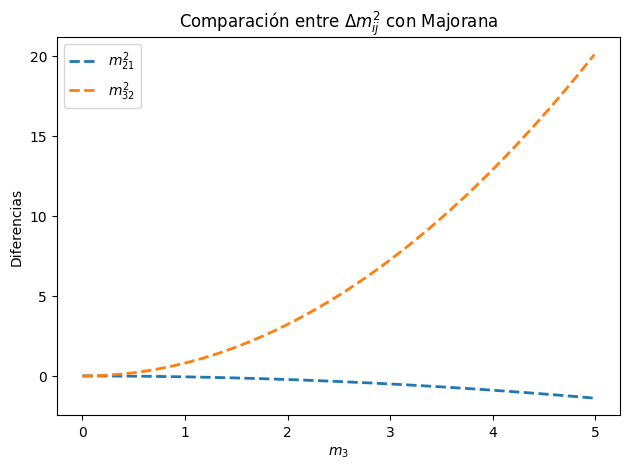

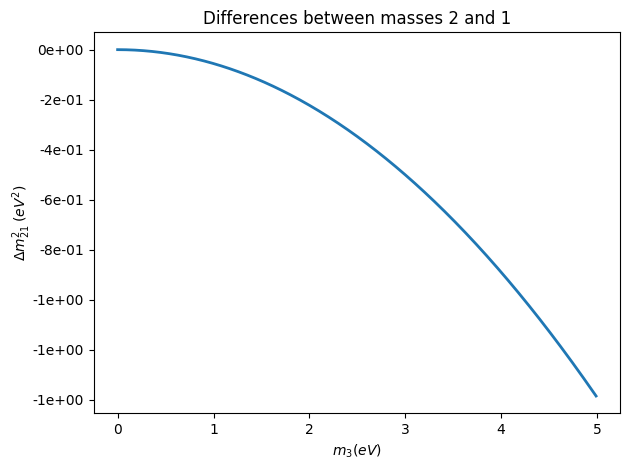

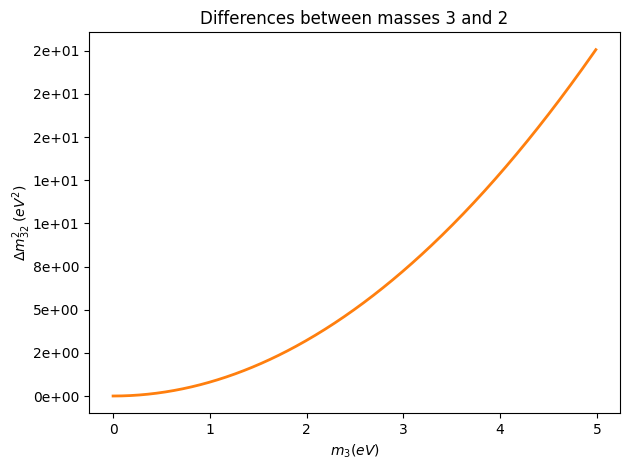

6112

In [3]:
def Major_Masa1_C1(i,j):
    return ((i*(C33+C03)-(i+j))/2)

def Major_Masa2_C1(i,j):
    return ((i*(C03-C33)-(i+j))/2)


y1C1 = Major_Masa2_C1(x, Corre_C1)**2 - Major_Masa1_C1(x, Corre_C1)**2
y2C1 = x**2 - Major_Masa2_C1(x, Corre_C1)**2

fig, ax = plt.subplots()
line1, = ax.plot(x, y1C1, linewidth=2.0, label='$m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x, y2C1, linewidth=2.0, label='$m_{32}^2$', linestyle='dashed')
ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre $\Delta m_{ij}^2$ con Majorana')
ax.legend()
plt.tight_layout()
#plt.savefig("graf5.png", dpi=300)
plt.show()

##
# Aqui nos enfocamos en el comportamiento de la delta 2-1
##
fig, ax = plt.subplots()
ax.plot(x, y1C1, linewidth=2.0)
ax.set_xlabel('$m_3 (eV)$')
ax.set_ylabel('$\Delta m_{21}^2\; (eV^2)$', labelpad=0)
ax.set_title('Differences between masses 2 and 1')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.tight_layout()
#plt.savefig("graf5-1eng.png", dpi=300)
plt.show()

##
# Aqui nos enfocamos en el comportamiento de la delta 2-1
##
fig, ax = plt.subplots()
ax.plot(x, y2C1, linewidth=2.0, color='tab:orange')
ax.set_xlabel('$m_3 (eV)$')
ax.set_ylabel('$\Delta m_{32}^2\; (eV^2)$', labelpad=0)
ax.set_title('Differences between masses 3 and 2')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.tight_layout()
#plt.savefig("graf5-1eng.png", dpi=300)
plt.show()

gc.collect()

### **Repitiendo el proceso pero ahora incluyendo los valores experimentales $(\Delta m^2_{21})_{\mathrm{Exp}}$ y $(\Delta m^2_{32})_{\mathrm{Exp}}$ y comparando las gráficas con las calculadas anteriormente**

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_29846/4293571065.py:7: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp}$')
/tmp/ipykernel_29846/4293571065.py:9: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta$', rotation=0)
/tmp/ipykernel_29846/4293571065.py:19: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$')
/tmp/ipykernel_29846/4293571065.py:21: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta$',rotation=0)


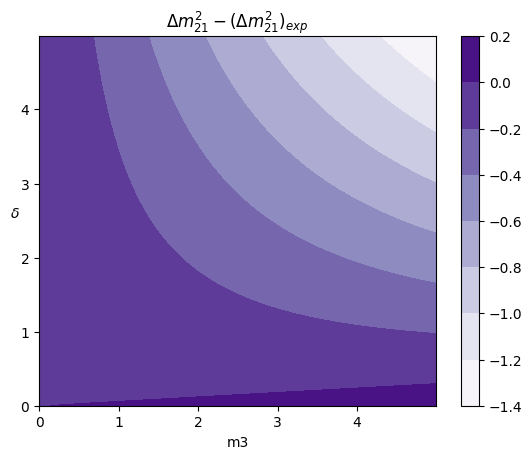

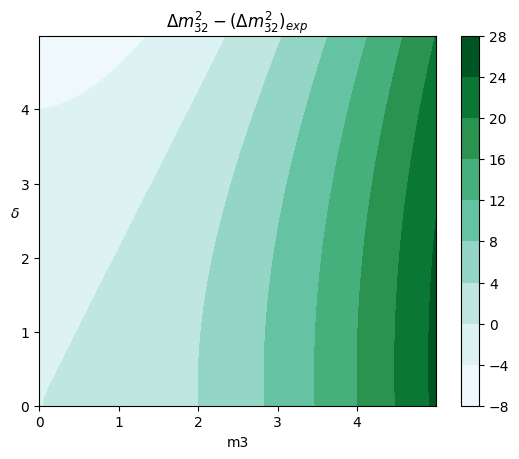

5076

In [4]:
Z1_0 = Major_Masa2_C1(X1,Y1)**2 - Major_Masa1_C1(X1,Y1)**2

fig,ax = plt.subplots()
cp3 = ax.contourf(X1, Y1, Z1_0-Del21, cmap='Purples')
#ax.clabel(cp3, inline=True, fontsize=10)
fig.colorbar(cp3)
ax.set_title('$\Delta m_{21}^2 - (\Delta m_{21}^2)_{exp}$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g1morado.png", dpi=300)
plt.show()

Z1_1 = X1**2 - Major_Masa2_C1(X1,Y1)**2

fig,ax = plt.subplots()
cp4 = ax.contourf(X1, Y1, Z1_1-Del32, cmap= 'BuGn')
#ax.clabel(cp4, inline=True, fontsize=10)
fig.colorbar(cp4)
ax.set_title('$\Delta m_{32}^2 - (\Delta m_{32}^2)_{exp}$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$',rotation=0)
#plt.savefig("g2verde.png", dpi=300)
plt.show()

gc.collect()

<>:18: SyntaxWarning: invalid escape sequence '\;'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\;'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_29846/452597971.py:18: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel('$m_3\; (eV)$')
/tmp/ipykernel_29846/452597971.py:19: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta \; (eV)$', rotation=0)


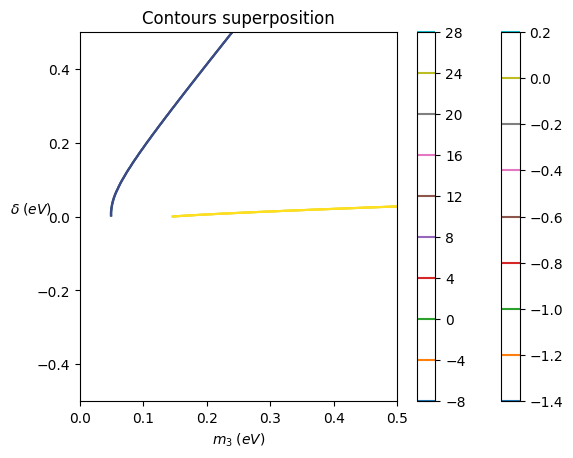

9955

In [11]:
fig,ax=plt.subplots()
manual_locations = [(1, 2)]
manual_locations2 = [(0.06, 3)]

cp5 = ax.contour(X1, Y1,  Z1_0 - Del21, cmap='tab10' )
cp6 = ax.contour(X1, Y1, (Z1_0 - Del21)+dDel21, cmap='spring')
cp7 = ax.contour(X1, Y1, (Z1_0 - Del21)-dDel21, cmap='spring')
ax.clabel(cp5, inline=True, fontsize=14, fmt='%1.5f')

cp8  = ax.contour(X1, Y1,  Z1_1 - Del32 ,cmap='tab10' )
cp9  = ax.contour(X1, Y1, (Z1_1 - Del32)+dDel32, cmap='viridis')
cp10 = ax.contour(X1, Y1, (Z1_1 - Del32)-dDel32, cmap='viridis')
ax.clabel(cp8, inline=True, fontsize=14, fmt='%1.5f')

fig.colorbar(cp5)
fig.colorbar(cp8)
ax.set_title('Contours superposition')
ax.set_xlabel('$m_3\; (eV)$')
ax.set_ylabel('$\delta \; (eV)$', rotation=0)

plt.xlim([0,0.5])
plt.ylim([-0.5,0.5])
#plt.savefig("g5eng.png", dpi=300)
plt.show()

gc.collect()

<>:156: SyntaxWarning: invalid escape sequence '\d'
<>:156: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_29846/3184437119.py:156: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta$', rotation=0)
/tmp/ipykernel_29846/3184437119.py:48: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol in cp2_0.collections:
/tmp/ipykernel_29846/3184437119.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol2 in cp2_11.collections:
/tmp/ipykernel_29846/3184437119.py:58: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol in cp2_0.collections:
/tmp/ipykernel_29846/3184437119.py:60: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be rem

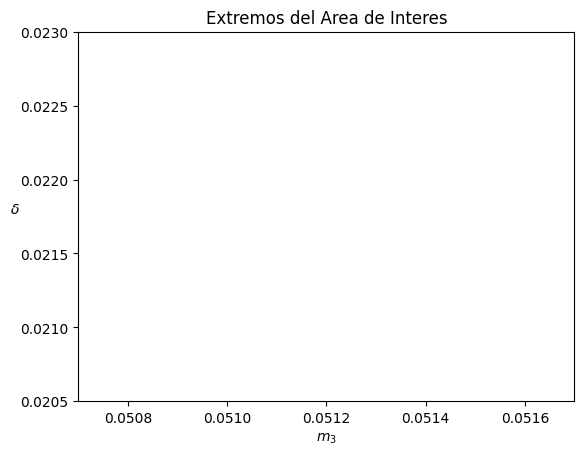

4022

In [6]:
def find_intersections(A, B):
    #this function stolen from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections#answer-9110966
    # min, max and all for arrays
    amin = lambda x1, x2: np.where(x1<x2, x1, x2)
    amax = lambda x1, x2: np.where(x1>x2, x1, x2)
    aall = lambda abools: np.dstack(abools).all(axis=2)
    slope = lambda line: (lambda d: d[:,1]/d[:,0])(np.diff(line, axis=0))

    x11, x21 = np.meshgrid(A[:-1, 0], B[:-1, 0])
    x12, x22 = np.meshgrid(A[1:, 0], B[1:, 0])
    y11, y21 = np.meshgrid(A[:-1, 1], B[:-1, 1])
    y12, y22 = np.meshgrid(A[1:, 1], B[1:, 1])

    m1, m2 = np.meshgrid(slope(A), slope(B))
    m1inv, m2inv = 1/m1, 1/m2

    yi = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi = (yi - y21)*m2inv + x21
    yi_1 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_1 = (yi - y21)*m2inv + x21
    
    yi_2 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_2 = (yi - y21)*m2inv + x21
    
    yi_3 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_3 = (yi - y21)*m2inv + x21

    xconds = (amin(x11, x12) < xi, xi <= amax(x11, x12), 
              amin(x21, x22) < xi, xi <= amax(x21, x22) )
    yconds = (amin(y11, y12) < yi, yi <= amax(y11, y12),
              amin(y21, y22) < yi, yi <= amax(y21, y22) )

    return xi[aall(xconds)], yi[aall(yconds)]

cp2_0  = ax.contour(X1, Y1,  Z1_0 - Del21, cmap='tab10' )
cp2_01 = ax.contour(X1, Y1, (Z1_0 - Del21)+dDel21, cmap='spring')
cp2_02 = ax.contour(X1, Y1, (Z1_0 - Del21)-dDel21, cmap='spring')

cp2_1  = ax.contour(X1, Y1,  Z1_1 - Del32 ,cmap='tab10' )
cp2_11 = ax.contour(X1, Y1, (Z1_1 - Del32)+dDel32, cmap='viridis')
cp2_12 = ax.contour(X1, Y1, (Z1_1 - Del32)-dDel32, cmap='viridis')

##
#Cruce de centrales con errores verticales
##
xi = np.array([])
yi = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi = np.append(xi, xinter)
                yi = np.append(yi, yinter)
                
xi_1 = np.array([])
yi_1 = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_1 = np.append(xi_1, xinter)
                yi_1 = np.append(yi_1, yinter)

##      
#Cruce de centrales con errores horizontales
##
xi_2 = np.array([])
yi_2 = np.array([])
for linecol in cp2_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_01.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_2 = np.append(xi_2, xinter)
                yi_2 = np.append(yi_2, yinter)
                
xi_3 = np.array([])
yi_3 = np.array([])
for linecol in cp2_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_02.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_3 = np.append(xi_3, xinter)
                yi_3 = np.append(yi_3, yinter)


##      
#Cruce de errores horizontales y verticales
##
xi_4 = np.array([])
yi_4 = np.array([])
for linecol in cp2_01.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_4 = np.append(xi_4, xinter)
                yi_4 = np.append(yi_4, yinter)
                
xi_5 = np.array([])
yi_5 = np.array([])
for linecol in cp2_01.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_5 = np.append(xi_5, xinter)
                yi_5 = np.append(yi_5, yinter)

xi_6 = np.array([])
yi_6 = np.array([])
for linecol in cp2_02.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_6 = np.append(xi_6, xinter)
                yi_6 = np.append(yi_6, yinter)
                
xi_7 = np.array([])
yi_7 = np.array([])
for linecol in cp2_02.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_7 = np.append(xi_7, xinter)
                yi_7 = np.append(yi_7, yinter)

xi_8 = np.array([])
yi_8 = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_1.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_8 = np.append(xi_8, xinter)
                yi_8 = np.append(yi_8, yinter)


plt.scatter(xi, yi, s=20)
plt.scatter(xi_1, yi_1, s=20)
plt.scatter(xi_2, yi_2, s=20)
plt.scatter(xi_3, yi_3, s=20)
plt.scatter(xi_4, yi_4, s=20)
plt.scatter(xi_5, yi_5, s=20)
plt.scatter(xi_6, yi_6, s=20)
plt.scatter(xi_7, yi_7, s=20)
plt.scatter(xi_8, yi_8, s=20)

plt.title('Extremos del Area de Interes')
plt.xlabel('$m_3$')
plt.ylabel('$\delta$', rotation=0)

plt.xlim([0.0507,0.0517])
plt.ylim([0.0205,0.023])
#plt.savefig("gpuntos.png", dpi=300)

plt.show()
gc.collect()

In [7]:
##Aqui encontramos los valores de los puntos para determinar
#el rango.
print(xi[1]  , yi[1])   #Lateral derecho
print(xi_1[1], yi_1[1]) #Lateral izquierdo
print(xi_2[3], yi_2[3]) #inferior
print(xi_3[3], yi_3[3]) #superior
print(xi_4[1], yi_4[1]) #Esquina inferior izquierda
print(xi_5[1], yi_5[1]) #Esquina inferior derecha
print(xi_6[1], yi_6[1]) #Esquina superior izquierda
print(xi_7[1], yi_7[1]) #Esquina superior derecha
print(xi_8[1], yi_8[1]) #Central

gc.collect()

4.873508666816462 4.45190499542932
4.87351439648647 4.451900445310641
1.2813635080789045 2.7132185741099684
1.2813519777848614 2.7131940748730146
4.873509717459924 4.451910407025923
4.873515447129747 4.45190585690739
4.873507616173 4.451899583832716
4.873513345843192 4.451895033713892
4.8735115316514275 4.451902720370011


0

In [8]:
for i in range(5083, 5156):
    for j in range(2089, 2232):
        if Del32+dDel32 >= (i*0.00001)**2- Major_Masa2_C1(i*0.00001, j*0.00001)**2 >= Del32-dDel32:
            if Del21+dDel21 >= Major_Masa2_C1(i*0.00001, j*0.00001)**2 - Major_Masa1_C1(i*0.00001, j*0.00001)**2 >= Del21-dDel21:
                print('m_3=', i*0.00001,'Corrección:', j*0.00001)
                print('Delta M21=', Major_Masa2_C1(i*0.00001, j*0.00001)**2 - Major_Masa1_C1(i*0.00001, j*0.00001)**2, 'DeltaM32=', (i*0.00001)**2- Major_Masa2_C1(i*0.00001, j*0.00001)**2)
gc.collect()

0